# Logistic Regression
## contents
### Problem formulation and expected result
### 2. Preparation
#### 2.1. Load packages and settings
#### 2.2. Load data
### 3. Data inspection
#### 3.1. Basic data inspect
#### 3.2. Check null values and fix them
#### 3.3. Inspect relationships, distributions and outliers of numerical data
#### 3.4. Inspect relationships, distributions and outliers of categorical data
#### 3.5. investigate the distribution of y






## 1. Problem formulation and expected result
### based on the customer data, 
### a. what are the factors tell if a loan is good or bad?
### b. predict whether the loan of a customer should be approved (if the loan is good or bad).

## 2. Preparation
### 2.1.  Load packages and settings

In [1]:
#load packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

In [2]:
#set the plot size
sns.set(rc = {'figure.figsize':(12,10)})

In [3]:
#see all columns
pd.set_option('display.max_columns', None)

In [4]:
#change scientific numbers to float
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

In [5]:
# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2.2. Load data

In [6]:
raw_data = pd.read_csv('/Users/juli/Desktop/ML/people.csv')

## 3. Data inspection
### 3.1. Basic data inspect

In [7]:
#check the first 5 rows
raw_data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [8]:
#check the amount of rows and columns
raw_data.shape

(1006, 14)

In [10]:
# check the unique values in each column
for col in raw_data:
    print(col)
    print(raw_data[col].unique())
    print(len(raw_data[col].unique()))
    print('\n')

Type of Account
['No Data' 'Type A' 'Type B' 'Type C' nan]
5


Account History
['critical' 'Average (known delays)' 'Good' nan]
4


Reason for the Loan
['Learning / Edu purposes' 'TV' 'Buying a New Car' 'Home furniture'
 'Support for Business' 'Buying a Used Car' 'Renovation' 'All other'
 'Home Devices' 'Advance Edu/training' nan]
11


Loan Amount
[2116.000000 2438.000000 2144.000000 2073.000000 1276.000000 6130.000000
 1394.000000 7242.000000 9581.000000 734.000000 1421.000000 621.000000
 816.000000 2017.000000 7873.000000 3579.000000 3869.000000 1259.000000
 2289.000000 699.000000 1595.000000 1917.000000 2875.000000 1071.000000
 3785.000000 1377.000000 950.000000 1511.000000 1954.000000 3080.000000
 3359.000000 1554.000000 1295.000000 1189.000000 727.000000 2694.000000
 1172.000000 2750.000000 1235.000000 6324.000000 1403.000000 2409.000000
 3373.000000 1525.000000 7643.000000 10141.000000 711.000000 1046.000000
 5819.000000 1873.000000 11596.000000 1464.000000 3234.000000 2351.00000

In [14]:
# only loan and age are numerical, others are categorical

### 3.2. Check null values and fix them

In [11]:
#check null values
raw_data.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [12]:
# check the null value situation by inspecting the column with the most null value first
raw_data[raw_data['Employment History'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# all rows are almost whole-null-world, so they can be deleted
raw_data = raw_data.dropna(subset = ['Employment History'])

raw_data.isnull().sum()
# the rows with null data are that 5 rows

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

### 3.3. Inspect relationships, distributions and outliers of numerical data

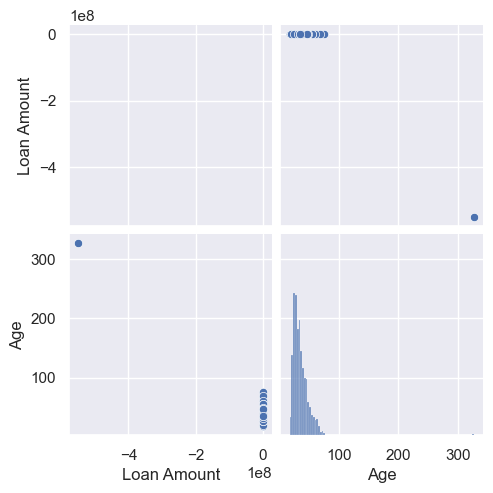

In [15]:
# pairplot
g = sns.pairplot(raw_data)

In [ ]:
# check out the outliers
raw_data[raw_data["age"] > 100]

In [ ]:
# delete the outlier
raw_data = raw_data[raw_data["age"] < 100]

# check out the pairplot again
g = sns.pairplot(raw_data, hue = 'Good Loan')

### 3.4. Inspect relationships, distributions and outliers of categorical data

In [ ]:
# Loop through all the categorical variables v.s. y

features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = 'Good Loan')
    plt.show()

### 3.5. investigate the distribution of y

In [ ]:
# investgate the distribution of y
sns.countplot(x = "Good Loan", data = raw_data, palette = "Set3")
# count of good and bad loan are not far from each other, so it's balanced and there's no need to balance it